In [2]:
# import the datasets which is required : 
import seaborn as sns 
df = sns.load_dataset('iris')

In [3]:
# split the data into independent data and dependent data 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# encode the categorical data into the 
from sklearn.preprocessing import LabelEncoder 
y = LabelEncoder().fit_transform(y) 

In [4]:
## split the data into training set and testing set : 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split (
        X,y,test_size = 0.2 , random_state = 42)


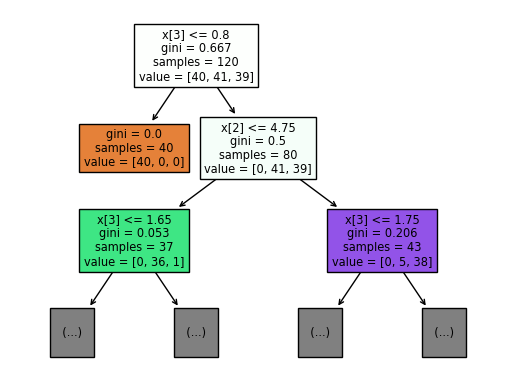

In [5]:
## apply the Decision Tree Classifiear to data sets : 
from sklearn.tree import DecisionTreeClassifier 
dt  = DecisionTreeClassifier ().fit(X_train,y_train)

# plot the Decision Tree for visulization : 
from sklearn import tree 
import matplotlib.pyplot as plt 
tree.plot_tree(dt,filled = True,max_depth=2)

plt.show()

In [6]:
## defining the hyperperameters for the hyperperameter tuning : 
from sklearn.model_selection import cross_val_score 
import optuna 
from sklearn.model_selection import KFold 

def objective (trial)  :
    criterion = trial.suggest_categorical('criterion',['gini','entropy','log_loss'] )
    splitter = trial.suggest_categorical('splitter', ['random','best'] )
    max_depth =trial.suggest_int('max_depth',2,8)
    min_samples_split = trial.suggest_int('min_samples_split',2,5) 
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2'] ) 
        
    clf = DecisionTreeClassifier ( 
                    criterion = criterion ,
                    splitter= splitter ,
    max_depth = max_depth ,
    min_samples_split = min_samples_split ,
    max_features  = max_features )
    val = KFold(5)
    acc = cross_val_score ( clf, X_train,y_train ,n_jobs = -1 , cv = val).mean()
    
    return acc 

if __name__ == "__main__" : 
    study = optuna.create_study (direction= 'maximize')
    study.optimize(objective , n_trials= 50)
    


[I 2023-03-27 16:28:43,030] A new study created in memory with name: no-name-5640ded3-c423-4192-ac17-ae2f7913d5f4
[I 2023-03-27 16:28:46,361] Trial 0 finished with value: 0.7999999999999999 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7999999999999999.
[I 2023-03-27 16:28:46,396] Trial 1 finished with value: 0.825 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.825.
[I 2023-03-27 16:28:46,429] Trial 2 finished with value: 0.9416666666666668 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.9416666666666668.
[I 2023-03-27 16:28:46,462] Trial 3 finished with value: 0.925 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split'

[I 2023-03-27 16:28:47,628] Trial 32 finished with value: 0.8833333333333334 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9416666666666668.
[I 2023-03-27 16:28:47,663] Trial 33 finished with value: 0.9416666666666668 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9416666666666668.
[I 2023-03-27 16:28:47,702] Trial 34 finished with value: 0.9166666666666667 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9416666666666668.
[I 2023-03-27 16:28:47,741] Trial 35 finished with value: 0.9166666666666667 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.94166666666666

In [7]:
study.best_params 
hpt_dt = DecisionTreeClassifier (**study.best_params).fit(X_train,y_train)
hpt_dt

DecisionTreeClassifier(max_depth=8, max_features='sqrt')

In [8]:
y_pred =dt.predict(X_test)
y_pred_hpt= hpt_dt.predict(X_test)
print(y_pred_hpt)
print(y_pred)
print(y_test)

## so from this we can classify the all 3 categorys with the  1 accuracy 
## error_rate 


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [9]:
from sklearn.metrics import accuracy_score , classification_report

accuracy_score (y_pred , y_test) 

print(classification_report ( y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

